# Introduction to Scikit-Learn (sklearn)
This notebook demonstrates some of the useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the dat ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm/estimator and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

In [42]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"
]

In [4]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

### Setup housing for later examples

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]

# 0. An end-to-end Scikit-Learn workflow

## 1. Get the data ready

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
# X is the features matrix and Y is the target
# X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

## 2. Choose the right model and hyperparameters

In [4]:
from sklearn.ensemble import RandomForestClassifier
# model is a commonly used name also
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3. Fit the model to the training data

In [7]:
from sklearn.model_selection import train_test_split

# 80% is for training, 20% is for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2


### make a prediction

In [9]:
# Data passed into model must have same shape as the training data (X_train in this case)
# Below gives error since [0,2,3,4] has shape (4,) while data model was trained on (X_train) has shape (242, 13)
y_label = clf.predict(np.array([0,2,3,4]))

/home/justin/miniconda3/envs/sample_project/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [3]:
y_preds = clf.predict(X_test)
y_preds, type(y_preds)

(array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]),
 numpy.ndarray)

In [4]:
y_test

232    0
59     1
278    0
229    0
135    1
      ..
71     1
63     1
115    1
18     1
267    0
Name: target, Length: 61, dtype: int64

## 4. Evaluate the model on the training data and test data

In [5]:
clf.score(X_train, y_train)

1.0

In [6]:
clf.score(X_test, y_test)

0.7868852459016393

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73        23
           1       0.86      0.79      0.82        38

    accuracy                           0.79        61
   macro avg       0.77      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [8]:
cm = confusion_matrix(y_test, y_preds)
cm, type(cm), cm.shape

(array([[18,  5],
        [ 8, 30]]),
 numpy.ndarray,
 (2, 2))

In [9]:
accuracy_score(y_test, y_preds), type(accuracy_score(y_test, y_preds))

(0.7868852459016393, numpy.float64)

## 5. Improve a model

### Try different amount of n_estimators

In [10]:
import numpy as np
np.random.seed(42)
for i in range (10,100,10):
    print(f"Trying model with {i} estimators...")
    # instantiate another model
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 77.05%

Trying model with 20 estimators...
Model accuracy on test set: 75.41%

Trying model with 30 estimators...
Model accuracy on test set: 80.33%

Trying model with 40 estimators...
Model accuracy on test set: 85.25%

Trying model with 50 estimators...
Model accuracy on test set: 80.33%

Trying model with 60 estimators...
Model accuracy on test set: 77.05%

Trying model with 70 estimators...
Model accuracy on test set: 80.33%

Trying model with 80 estimators...
Model accuracy on test set: 83.61%

Trying model with 90 estimators...
Model accuracy on test set: 78.69%



## 6. Save and load a trained model

In [ ]:
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [ ]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into feature and labels (usually `X` & `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [ ]:
heart_disease.head()

In [ ]:
X = heart_disease.drop("target", axis=1)
X.head()

In [ ]:
y = heart_disease["target"]
y.head()

### Split the data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X.shape

In [ ]:
len(heart_disease)

In [ ]:
X.shape[0] * 0.8, X.shape[0] * .2

### 1.1 Make sure the data is all numerical

In [11]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [ ]:
len(car_sales)

In [12]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

### Split the data

In [13]:
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Build maching learning model

In [14]:
# Use RandomForestRegressor instead of RandomForestClassifier
#   We use Classifier to predict if patient target was a 0 or a 1;
#      in other words, a specific category ("is" or "is not")
#   Regressor is used to predict a number (e.g. 13500, 22,897, etc),
#      there is a range that the target can be, not set categories
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# This will fail since Make and Colour are strings, not numbers.
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

### Convert Make and Colour data from strings to numbers

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X, type(transformed_X)

(array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 3.54310e+04],
        [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         1.00000e+00, 1.92714e+05],
        [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 8.47140e+04],
        ...,
        [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 6.66040e+04],
        [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 2.15883e+05],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 2.48360e+05]]),
 numpy.ndarray)

In [16]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [17]:
car_sales["Make"].unique(), car_sales["Colour"].unique(), car_sales["Doors"].unique()

(array(['Honda', 'BMW', 'Toyota', 'Nissan'], dtype=object),
 array(['White', 'Blue', 'Red', 'Green', 'Black'], dtype=object),
 array([4, 5, 3]))

In [18]:
# Columns numbered 0-12 (4 cols for Make, 5 cols for Colour, 1 col for Odometer (KM), 3 cols for Doors)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [19]:
# Similar to OneHotEncoder, but columns have names instead of numbers
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


#### Let's try and refit the model

In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)

#### Evaluate the model

In [ ]:
model.score(X_test, y_test)

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [3]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [4]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Create X and y

In [5]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

#### Let's try and convert our data to numbers

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [7]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

## Optional ways to deal with NaN

### Option 1: FIll missing data with pandas

In [8]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [9]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

#### Remove rows with missing Price value

In [10]:
car_sales_missing.dropna(inplace=True)

In [11]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [12]:
len(car_sales_missing)

950

#### After dealing with missing data:

In [13]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
categorical_features = ["Make", "Colour", "Doors"]
transformer = ColumnTransformer([("one_hot",
                                     one_hot,
                                     categorical_features)],
                                     remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [15]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [16]:
car_sales_missing.groupby(["Colour"]).count()

,Make,Odometer (KM),Doors,Price
Colour,,,,
Black,91,94,89,89
Blue,287,290,286,292
Green,73,71,72,72
Red,86,82,81,81
White,365,366,376,370


In [17]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [18]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [19]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
# Check missing values
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

#### Fill missing values with Scikit-Learn

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.fit_transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [22]:
# Get transformed data arrays back into DataFrames
car_sales_filled_train = pd.DataFrame(filled_X_train,
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled_test = pd.DataFrame(filled_X_test,
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled_train.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,71934.0
1,Toyota,Red,4.0,162665.0
2,Honda,White,4.0,42844.0
3,Honda,White,4.0,195829.0
4,Honda,Blue,4.0,219217.0


In [23]:
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.fit_transform(car_sales_filled_test)
transformed_X_train, transformed_X_train.toarray()

(<760x15 sparse matrix of type '<class 'numpy.float64'>'
 	with 3040 stored elements in Compressed Sparse Row format>,
 array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 7.19340e+04],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 1.62665e+05],
        [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 4.28440e+04],
        ...,
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 1.96225e+05],
        [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 1.33117e+05],
        [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 1.50582e+05]]))

#### Now we've got our data as numbers and  filled (no missing values)
#### Let's fit a model

In [25]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.25366332156443805

In [26]:
len(transformed_X_train.toarray()) + len(transformed_X_test.toarray()), len(car_sales)

NameError: name 'car_sales' is not defined

## 2. Choosing the right estimator/algorithm for your problem

Some things to note:

* Sklearn refers to machine learning models, algorithm as estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

If you're working on a machine learning problem and looking to use Sklearn and
not sure what model you should use, refer to the sklearn machine learning map:
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [27]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
len(housing["data"][0]), housing

(8,
 {'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
            37.88      , -122.23      ],
         [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
            37.86      , -122.22      ],
         [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
            37.85      , -122.24      ],
         ...,
         [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
            39.43      , -121.22      ],
         [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
            39.43      , -121.32      ],
         [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
            39.37      , -121.24      ]]),
  'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
  'frame': None,
  'target_names': ['MedHouseVal'],
  'feature_names': ['MedInc',
   'HouseAge',
   'AveRooms',
   'AveBedrms',
   'Population',
   'AveOccup',
   'Latitude',
   'Longitude'],
  'DESCR': '.. _

In [28]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [29]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Import algorithm/estimator

#### Ridge Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge() # Reminder: Scikit-Learn refers to model as estimator
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

What if `Ridge` didn't work or the score didn't fit our needs?

We can always try a different model...

How about we try an ensemble model (an ensemble is a combination of smaller models
to try and make better predictions than just a single model)

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

#### sklearn.ensemble.RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Model trains on training data
model.fit(X_train, y_train)

# Model predicts on the test set
model.score(X_test, y_test)

#### Lasso

In [ ]:
from sklearn.linear_model import Lasso

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Lasso()
model.fit(X_train, y_train)

model.score(X_test, y_test)

## 2.2 Picking a machine learning model for a classification problem

Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [30]:
import pandas as pd
import numpy as np

heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
len(heart_disease)

Consulting the map and it says to try `LinearSVC`.

In [ ]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

In [31]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

#### Compare `LinearSVC` to `RandomForestClassifier`

In [ ]:
# Import RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

#### Tidbit:

    1. If you have structured data (i.e., data in tables), use ensemble methods
    2. If you have unstructured data (i.e., pictures, audio, text), use deep learning or transfer learning

In [32]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
what_were_covering

## 3. Fit the model/algorithm on our data and us it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* X = features, feature variables, data
* y = labels, targets, target variables

In [33]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier (use the patterns th model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
y.tail()

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba`

In [ ]:
# Use a trained model to make predictions
clf.predict(np.array([1,7,8,3,4])) # this doesn't work

In [34]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [35]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [36]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

#### Compare predictions to truth labels to evaluate the model

We'll show 3 ways:
1. `np.mean()`
2. `clf.score()`
3. `accuracy_score()`

In [37]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [38]:
clf.score(X_test, y_test)

0.8524590163934426

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

### Make predictions with `predict_proba()`

In [40]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [41]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [42]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

#### `predict()` can also be used for regression models.

In [17]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)


In [44]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [45]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [46]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

In [47]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [ ]:
what_were_covering

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score` method

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
model = RandomForestClassifier()

# Fit classifier to training data
model.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
# The highest value for the .score() method is 1.0, lowest is 0.0
model.score(X_train, y_train)

1.0

In [50]:
model.score(X_test, y_test)

0.8524590163934426

#### Let's use the `score()` method on our regression problem...

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

# The default score() evaluation is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0
model.score(X_test, y_test)

0.8066196804802649

### 4.2 Evaluating a model using the `scoring` parameter

In [52]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

clf = RandomForestClassifier().fit(X_train, y_train)

In [53]:
clf.score(X_test, y_test)

0.8524590163934426

In [54]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [55]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [56]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [57]:
# Default scoring parameter of classifier = mean accuracy
# clf.score(X, y, sample_weight=None) Docstring: Return the mean accuracy on the given test data and labels.
clf.score(X_test, y_test)

0.8524590163934426

In [58]:
# Scoring parameter set to None by default
np.random.seed(42)
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

### Why use cross-validation?

Cross-validation aims to solve the problem of <strong>not</strong> training all the data on a single split and possibly getting lucky scores.

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

### Accuracy

In [64]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [10]:
np.mean(cross_val_score)

0.8248087431693989

In [11]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


### Area under the receiver operating characteristic curve (AUC/ROC)

* Areas under curve (AUC)
* ROC curve

ROC curves area  comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [12]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [14]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [15]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

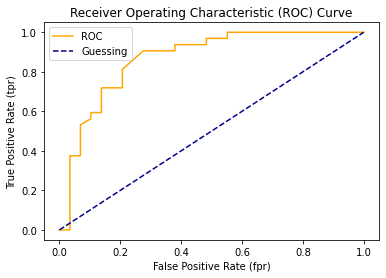

In [16]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline, aka control)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [17]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

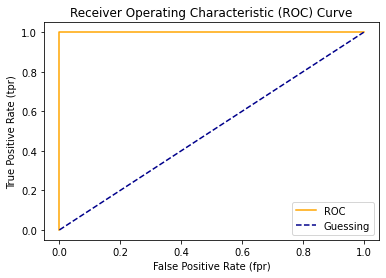

In [18]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [19]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

### Confusion Matrix

The next way to evaluate a classification model is by using a confusion matrix.

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

See here for sklearn confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [20]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

#### Visualize confusion matrix with `pd.crosstab()`

In [21]:
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Label"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [22]:
23 + 6 + 6 + 26

61

In [23]:
len(y_preds), len(X_test)

(61, 61)

### Below is from older version (sklearn version < 1.0)
#### Make our confusion matrix more visual with Seaborn's `heatmap()`

Need to install `seaborn`.

One way to install `seaborn` is with the command line:
```sh
cd ~/miniconda3/envs/sample_project
conda env list
conda activate sample_project
conda install seaborn
```

Another option is to install within `jupyter notebook` as seen below:

In [32]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done

## Package Plan ##

  environment location: /home/justin/miniconda3/envs/sample_project

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.11.2             |     pyhd3eb1b0_0         218 KB
    ------------------------------------------------------------
                                           Total:         218 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.2-pyhd3eb1b0_0

The following packages will be UPDATED:

  certifi                          2021.10.8-py39h06a4308_0 --> 2021.10.8-py39h06a4308_2
  openssl                                 1.1.1l-h7f8727e_0 --> 1.1.1m-h7f8727e_0



seaborn-0.11.2       | 218 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


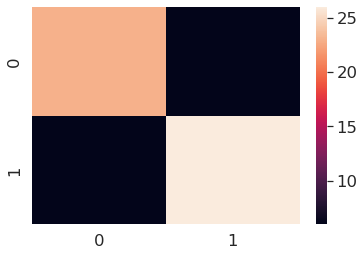

In [33]:
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

### Ends older version

### From newer version
#### Creating a confusion matrix using Scikit-Learn

To use the new methods of creating a confusion matix with Scikit-Learn, you will need sklearn version 1.0+ - https://scikit-learn.org/stable/install.html

In [24]:
import sklearn
sklearn.__version__

'1.0.1'

In [25]:
clf

RandomForestClassifier()

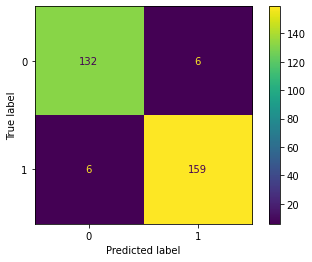

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

# from_estimator does not need predictions, it makes predictions for you
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

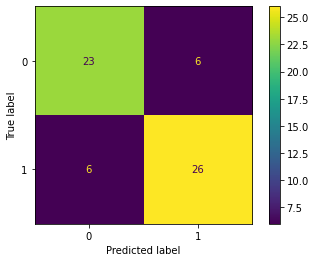

In [27]:
# from_predictions needs predictions that you have prepared
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds)

### Classification Report

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on. 
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - The average precision, recall and F1 score between classes. Macro avg doesn't class imbalance into account, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - The weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

#### Example: Where precision and recall become valuable

In [32]:
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True))

/home/justin/miniconda3/envs/sample_project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/justin/miniconda3/envs/sample_project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/justin/miniconda3/envs/sample_project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


For more information on metrics and scoring - https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)

In [11]:
model.score(X_test, y_test) # gives coefficient of determination

0.8066196804802649

In [12]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [14]:
y_test.mean()

2.0550030959302275

Read more on `r2_score` - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [5]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [16]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [17]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [41]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

### Mean Absolute Error (MAE)

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your model's predictions are.

In [6]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae 

0.3265721842781009

In [19]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [20]:
# MAE using formulas and differences
df["differences"].mean(), np.abs(df["differences"]).mean()

(0.012106921874999557, 0.32657218427810186)

### Mean Squared Error (MSE)

MSE is the mean of the square of the errors between actual and predicted values.

In [7]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [22]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [23]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.253407306913755

In [24]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16
df_large_error.iloc[0]

actual values           0.47700
predicted values        0.49384
differences             0.01684
squared_differences    16.00000
Name: 20046, dtype: float64

In [25]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [26]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.2572832072079409

In [27]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [28]:
df_large_error["squared_differences"].mean()

0.7333540351264827

### Which regression metric should you use?

* **R^2** is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your **R^2** value is to 1.0, the better the model; but, it does **NOT** really tell exactly how wrong your model is in terms of how far off each prediction is.
* **MAE** gives a better indication of how far off each of your model's predictions are on average.
* As for **MAE** or **MSE**, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses:
 * Pay more attention to MAE: When being \$10,000 off is **twice** as bad as being \$5,000 off.
 * Pay more attention to MSE: When being \$10,000 off is **more than twice** as bad as being \$5,000 off.

## Machine Learning Model Evaluation

Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

### Classification Model Evaluation Metrics/Techniques

* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy if equal to 1.0.
* **[Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)** - Indicates the proportion of positive identifications (model predicted class 1 instead of 0) which were actually correct. A model which produces no false positives has a precition of 1.0.
* **[Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **[F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **[Confusion Matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)** - Compares the predicted values with the true values in a tabular way. If 100% correct, all values in the matrix will be top left to bottom right (diagonal line).
* **[Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)** - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.
* **[Classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)** - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
* **[ROC Curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve)** - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.
* **[Areas Under Curve (AOC) Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)** - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

### Which classification metric should you use?

* **Accuracy** is a good measure to start with if all classes are balanced (e.g., same amount of samples which are labeled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced
* If false-positive predictions are worse than false-negatives, aim for higher precision.
* If false-negative predictions are worse than false-positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.
* A **confusion matrix** is always a good way to visualize how a classification model is going.

### Regression Model Evaluation Metrics/Techniques

* **[R^2 or the coefficient of determination](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)** - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.
* **[Mean Absolute Error (MAE)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong our predictions were.
* **[Mean Squared Error (MSE)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

### Which regression metric should you use?

* **R^2** is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your **R^2** values is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
* **MAE** gives a better indication of how far off each of your model's predictions are on average.
* As for **MAE** or **MSE**, because of the way MSE is calculated, squaring the differences between predicted values and actula values, it amplifies larger differences. Let's say we're predicting the value of houses:
 * Pay more attention to **MAE**: When being \$10,000 off is <em>**twice**</em> as bad as being\$5,000 off.
 * Pay more attention to **MSE**: When being \$10,000 off is **<em>more than trice</em>** as bad as being \$5,000 off.
 
For more resources on evaluating a machine learning model, be sure to check out the following resources:

* [Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)
* [Beyond Accuracy: Precision and Recall by Will Koehrson](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)
* [Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squaerd error)](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python/37861832#37861832)

### 4.2.3 Finally using the `scoring` parameter

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [37]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) 
# if scoring=None, estimator's default scoring evaluation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

### Cross-validated accuracy

In [33]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [34]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [38]:
print(f"The cross-validated accuracy is: {cv_acc.mean()*100:.2f}%")

The cross-validated accuracy is: 82.48%


### Precision

Indicates the proportion of positive identifications (model predicted class 1) which were actuall correct. A model which produces no false positives has a precision of 1.0.

In [39]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [42]:
# Cross-validated precision
print(f"The cross-validated precision is: {cv_precision.mean()}")

The cross-validated precision is: 0.8329547346025924


### Recall

Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

In [43]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [44]:
# Cross-valiated precision
print(f"The cross-validated precision is: {np.mean(cv_recall)}")

The cross-validated precision is: 0.8545454545454545


Let's see the `scoring` parameter being used for a regression problem...

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(42)

model = RandomForestRegressor()

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

In [47]:
np.random.seed(42)
# default scoring metric is coefficient of determination (R^2)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [48]:
cv_r2.mean()

0.6545756342466266

### Mean Squared Error

In [55]:
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([-0.51906307, -0.34788294, -0.37112854, -0.44980156, -0.4626866 ])

In [56]:
print(f"The cross-validated precision is: {np.mean(cv_mse)}")

The cross-validated precision is: -0.43011254261460774


### Mean Absolute Error

In [ ]:
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

In [ ]:
print(f"The cross-validated precision is: {np.mean(cv_mae)}")

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to use the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

### Note: Below compares 3 models on 3 different trained datasets, which is incorrect.


In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

heart_disease = pd.read_csv("data/heart-disease.csv")

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred):.2}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.85
Recall: 0.875
F1: 0.8615384615384615


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing_df = pd.DataFrame(data=housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Regression metrics on the test set")
print(f"R^2: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

Regression metrics on the test set
R^2: 0.8066196804802649
MAE: 0.3265721842781009
MSE: 0.2534073069137548


## 5. Improving a model

First prediction = baseline predictions.<br />
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data? (ex. more features than just make, color, odometer, etc, for car prices)

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs Parameters
* Parameters = model finds these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [22]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets: training, validaton and test.

* We're going to tr and adjust:

* `max_depth`
* `max_features`
* `min_samples_leave`
* `min_samples_split`
* `n_estimators`

In [23]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
          
    return metric_dict
    

In [28]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
#X = heart_disease_shuffled.drop("target", axis=1)
#y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
#train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
#valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
#X_train, y_train = X[:train_split], y[:train_split]
#X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
#X_test, y_test = X[valid_split:], y[valid_split:]

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_split, y_train, y_split = train_test_split(X, y, test_size=0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_split, y_split, test_size=0.5)

# len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validaton set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.80
Recall: 0.87
F1 score: 0.83


{'accuracy': 0.82, 'precision': 0.8, 'recall': 0.87, 'f1': 0.83}

In [25]:
baseline_metrics

{'accuracy': 0.76, 'precision': 0.78, 'recall': 0.75, 'f1': 0.77}

In [26]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 80.00%
Precision: 0.80
Recall: 0.83
F1 score: 0.82


### 5.2 Hyperparameter tuning with RandomizedSerachCV

In [29]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1,2,4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; tot

In [20]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30}

In [21]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.76
Recall: 0.89
F1 score: 0.82


### 5.3 Hyperparameter tuning with GridSearchCV

In [22]:
grid

{'n_estimators': [100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [24]:
6*5*2*3*3 * 5

2700

In [25]:
# Create refined search of initial grid
grid_2 = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [6],
    "min_samples_leaf": [1,2]
}

In [27]:
3*1*2*1*2 * 5

60

In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

heart_disease = pd.read_csv("data/heart-disease.csv")

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(
    estimator=clf,
    param_grid=grid_2,
    cv=5,
    verbose=2
)

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [30]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [31]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 85.25%
Precision: 0.87
Recall: 0.84
F1 score: 0.86


Let's compare our different models metrics.

<AxesSubplot:>

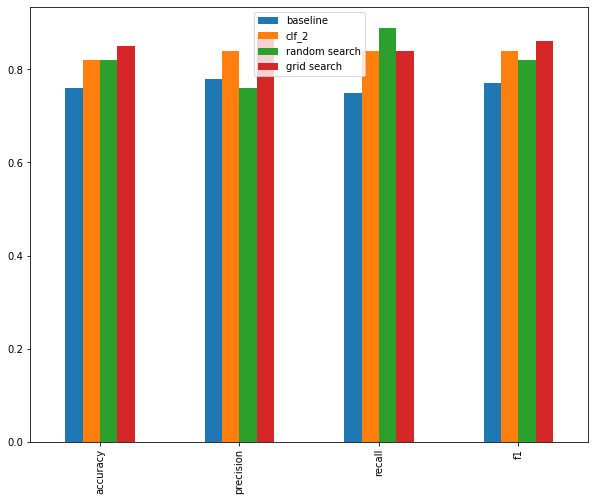

In [32]:
compare_metrics = pd.DataFrame(
    {
        "baseline": baseline_metrics,
        "clf_2": clf_2_metrics,
        "random search": rs_metrics,
        "grid search": gs_metrics
    }
)

compare_metrics.plot.bar(figsize=(10,8))

### Above compares 3 models on 3 different trained datasets, which is incorrect.

### Below is the correct method of using the same trained dataset for the 3 models.

## Comparing the metrics of different Scikit-Learn models

One of the most important things when comparing different models is to make sure they're compared on the same data splits.

For example, let's say you have `model_1` and `model_2` which each differ slightly.

If you want to compare and evaluate their results, `model_1` and `model_2` should both be trained on the same data(e.g., `X_train` and `y_train`) and their predictions should each be made on the same data, for example:

* `model_1.fit(X_train, y_train) -> model_1.predict(X_test) -> model_1_preds`
* `model_2.fit(X_train, y_train) -> model_2.predict(X_test) -> model_2_preds`

Note the differences here being the two models and the 2 different sets of predictions which can be compared against each other.

This short notebook compares 3 different models on a small dataset.

1. A baseline `RandomForestClassifier` (all default parameters)
2. A `RandomForestClassifier` tuned with `RandomizedSearchCV` (and `refit=True`)
3. A `RandomForestClassifier` tuned with `GridSearchCV` (and `refit=True`)

The most important part is they all use the same data splits created using `train_test_split()` and `np.random.seed(42)`

In [31]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

### Make Evaluation function

Our evaluation function will use all of the major classification metric functions from Scikit-Learn.

In [32]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    print(f"Acc: {accuracy * 100:0.2f}%")
    print(f"Precision: {precision:0.2f}")
    print(f"Recall: {recall:0.2f}")
    print(f"F1 score: {f1:0.2f}")
    
    return metric_dict

### Baseline model

Create model with default hyperparameters. See [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) documentation for more.

In [33]:
np.random.seed(42)

# Make & fit baseline model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier on validaton set
baseline_metrics = evaluate_preds(y_test, y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


### RandomizedSearchCV

Find hyperparameters with [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

**Note:** Although best parameters are found on different splits of `X_train` and `y_train`, because `refit=True`, once the best parameters are found, they are refit to the entire set of `X_train` and `y_train`. See [RandomizeSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) and [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) documentation for more.

In [34]:
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters grid
grid = {
    "n_estimators": [10,100,200,500,1000,1200],
    "max_depth": [None, 5,10,20,30],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2,4,6],
    "min_samples_leaf": [1,2,4]
}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(
    estimator=clf,
    param_distributions=grid,
    n_iter=10, # number of models to try
    cv=5,
    verbose=2,
    random_state=42, # set random_state to 42 for reproducibility (like np.random.seed(42))
    refit=True # set refit=True (default) to refit the best model on the full dataset
)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train) # 'rs' is short for RandomizedSearch

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=2)

In [35]:
# Check best parameters of RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [36]:
# Evaluate RandomizedSearch model
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the classifier on validation set
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### GridSearchCV

Find the best hyperparameters using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

**Note:** Although best parameters are found on different splits of `X_train` and `y_train`, because `refit=True`, once the best parameters are found, they are refit to the entire set of `X_train` and `y_train`. See [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) documentation for more.

In [37]:
from sklearn.model_selection import GridSearchCV

# Setup grid-2 (refined version of grid)
grid_2 = {
    "n_estimators": [50,100,150],
    "max_depth": [30, None],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2],
    "min_samples_leaf": [1,2,4]
}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSeachCV
gs_clf = GridSearchCV(
    estimator=clf,
    param_grid=grid_2,
    cv=5,
    verbose=2,
    refit=True # set refit=True (default) to refit the best model on the full dataset
)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train) # "gs" is short for GridSearch

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; to

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [38]:
# Find the best parameters of GridSearchCV
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 150}

In [39]:
# Evaluate GridSearchCV model
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the classifier on validation set
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


### Compare metrics

Compare all of the found metrics between the models.

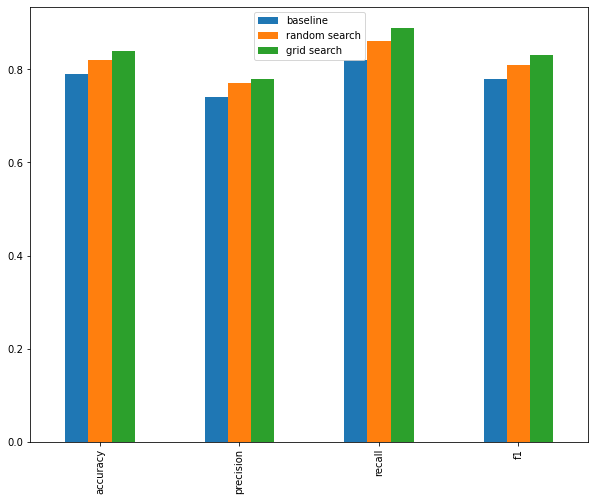

In [41]:
compare_metrics = pd.DataFrame({
    "baseline": baseline_metrics,
    "random search": rs_metrics,
    "grid search": gs_metrics
})

compare_metrics.plot.bar(figsize=(10,8));

### End Comparison on same data splits

In [43]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 6. Save and Load a Trained Machine Learning Model

Two ways to save and load a machine learning model:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [44]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [45]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [46]:
# Way to check the model is to make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

**Joblib**

In [47]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [51]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [53]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

## 7. Putting It All Together

### Things to remember
* All data should be numerical
* There should be no missing values
* Manipulate the test set the same as the training set
* Never test on data you've trained on
* Tune hyperparameters on validation set OR use cross-validation
* One best performance metric doesn't mean the best model

In [55]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [56]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [57]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [63]:
# Getteng the data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_features = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup the preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_features),
        ("num", numeric_transformer, numeric_features)
    ]
)

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`.

In [64]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [65]:
gs_model.score(X_test, y_test)

0.3339554263158365

In [66]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']